In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository: https://github.com/jaslynmiura/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [ ]:
# Importing necessary libraries.
import pandas as pd

In [ ]:
# Using read_csv to read in daily_aqi_by_county_2017 data and storing the data as 'aqi_17'.
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')

# Using read_csv to read in daily_aqi_by_county_2018 data and storing the data as 'aqi_2018'.
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [ ]:
# Using head() to view the first 5 rows of the aqi_17 dataframe.
aqi_17_head = aqi_17.head()

In [ ]:
# Using head() to view the first 5 rows of the aqi_18 dataframe.
aqi_18_head = aqi_18.head()

In [6]:
grader.check("q3_a")

q3_a results: All test cases passed!

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [ ]:
# Using concat() to stack the aqi_17 and aqi_18 dataframes and saving the new stacked dataframe as aqi.
aqi = pd.concat([aqi_17, aqi_18])

# Print aqi.
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


In [8]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [9]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



a line by line explanation of the code below the comment "#Simplify column names".

<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [ ]:
# Selecting the 'county_name' column within the aqi dataframe, and filtering to the rows within 'county_name' that are 'Santa Barbara'.
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Using drop() to remove the 'state_name', 'county_name', and 'state_code' columns from the aqi_sb dataframe.
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code'])

# Print aqi_sb.
aqi_sb

,county_code,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,83,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,83,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,83,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,83,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,83,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...,...
29128,83,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,83,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,83,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,83,2018-12-30,41,Good,PM2.5,06-083-1008,12


In [11]:
grader.check("q6a")

q6a results: All test cases passed!

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

*Your answer here.*

In [ ]:
# Checking the data types of the values in each column of the aqi_sb dataframe, using dtypes.
aqi_sb.dtypes

state_name                   object
county_name                  object
state_code                    int64
county_code                   int64
date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [ ]:
# Using to_datetime() to update the 'date' column to a date value in the aqi_sb dataframe.
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Setting the 'date' column as the index, using set_index().
aqi_sb = aqi_sb.set_index('date')

# Print aqi_sb.
aqi_sb

,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,,
2017-01-01,83,39,Good,Ozone,06-083-4003,12
2017-01-02,83,39,Good,PM2.5,06-083-2011,11
2017-01-03,83,71,Moderate,PM10,06-083-4003,12
2017-01-04,83,34,Good,Ozone,06-083-4003,13
2017-01-05,83,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
2018-12-27,83,37,Good,Ozone,06-083-1025,11
2018-12-28,83,39,Good,Ozone,06-083-1021,12
2018-12-29,83,39,Good,Ozone,06-083-1021,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [ ]:
# Calculate AQI rolling average over 5 days using rolling() and mean(), then dropping the 'county_code' and 'number_of_sites_reporting' columns.
rolling_average = aqi_sb.rolling('5D').mean('aqi').drop(columns=['county_code', 'number_of_sites_reporting'])

# Print rolling_average.
rolling_average

,aqi
date,
2017-01-01,39.000000
2017-01-02,39.000000
2017-01-03,49.666667
2017-01-04,45.750000
2017-01-05,44.000000
...,...
2018-12-27,41.200000
2018-12-28,38.600000
2018-12-29,38.200000


In [15]:
grader.check("q8")

q8 results: All test cases passed!

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [ ]:
# Adding a new column to aqi_sb called 'five_day_average' and inputting rolling_average as the values for the new column.
aqi_sb['five_day_average'] = rolling_average

# Print the aqi_sb, with the addition of the new 'five_day_average' column.
aqi_sb

,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,,
2017-01-01,83,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,83,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,83,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,83,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,83,37,Good,Ozone,06-083-4003,12,44.000000
...,...,...,...,...,...,...,...
2018-12-27,83,37,Good,Ozone,06-083-1025,11,41.200000
2018-12-28,83,39,Good,Ozone,06-083-1021,12,38.600000
2018-12-29,83,39,Good,Ozone,06-083-1021,12,38.200000


In [19]:
grader.check("q9")

q9 results:
    q9 - 1 result:
        ❌ Test case failed
        Trying:
            def test_q9(aqi_sb):
                try:
                    expected_data = pd.read_csv('data/t3_q9_df.csv', index_col='date', parse_dates=True)
                    pd.testing.assert_frame_equal(expected_data, aqi_sb)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q9(aqi_sb)
        Expecting nothing
        **********************************************************************
        Line 7, in q9 0
        Failed example:
            test_q9(aqi_sb)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q9 0[0]>", line 4, in test_q9
                pd.testing.assert_frame_equal(expected_data, aqi_sb)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 1218, in assert_frame_equal
                raise_assert_detail(
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 614, in raise_assert_detail
                raise AssertionError(msg)
            AssertionError: DataFrame are different

            DataFrame shape mismatch
            [left]:  (730, 6)
            [right]: (730, 7)

            During handling of the above exception, another exception occurred:

            Traceback (most recent call last):
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q9 0[1]>", line 1, in <module>
                test_q9(aqi_sb)
              File "<doctest q9 0[0]>", line 6, in test_q9
                raise AssertionError('Incorrect answer.')
            AssertionError: Incorrect answer.

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

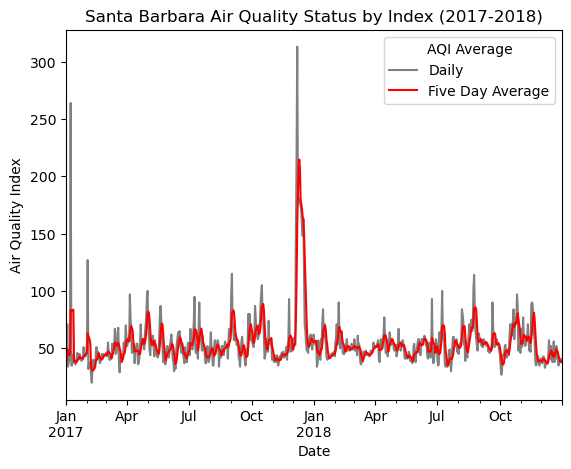

In [ ]:
# Creating a line plot of the average Santa Barbara air quality index, using the aqi_sb dataframe.
aqi_sb.plot(kind='line',
            y=['aqi', 'five_day_average'],
            ylabel='Air Quality Index',
            xlabel='Date',
            color=['grey', 'red'],
            title='Santa Barbara Air Quality Status by Index (2017-2018)').legend(title='AQI Average',
                                          labels=['Daily', 'Five Day Average'])

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).